In [4]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

import msyexp.datasets as ds
import msyexp.general as general
import msyexp.plotfuncs as pf

%matplotlib inline

In [5]:
outdir = '{}/eif1a'.format(ds.paths.NBOUTDIR)
if not os.path.exists(outdir):
    os.mkdir(outdir)

### EIF1AX vs. EIF1AY expression in XY samples

In [6]:
data = ds.get_gtex_data(males_only=True, adjusted=True)
meta = ds.get_metadata()
meta_ = meta.set_index('SAMPID')

In [7]:
data_h = general.housekeeping_normalize(data)

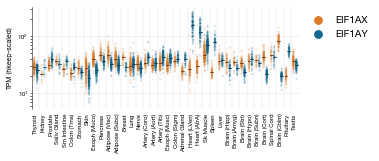

In [8]:
fig, ax = pf.plot_XY_stripplot(data_h, meta, 'EIF1AX', 'EIF1AY', s=2, alpha=0.2,
                               mline_lw=0.75)
ax.set_ylabel('TPM (hkeep-scaled)')

ylim = ax.get_ylim()
ax.set_ylim(ylim)
for x in (np.arange(35) + 0.5):
    ax.plot([x, x], ylim, ls='-', color='0.76', lw=0.25)

fig.set_figwidth(5.29)
fig.set_figheight(2.03)
fig.subplots_adjust(left=0.1, bottom=0.25, right=0.8, top=0.95)
ax = pf.format_axis_labels(ax, ticklabsize=6, labsize=7)

fig.savefig("{}/EIF1AXY_in_XYsamps.pdf".format(outdir))

### miR-1 expression

Data from Ludwig et al. _NAR_ 2016

In [9]:
mir1 = ds.get_mir1_expression()
mir1.head(10)

,sample_id,donor_id,tissue_gtex,hsa-miR-1-3p expression
0,adipocyte.1,1,Adipose - Subcutaneous,4.625263
1,arachnoid_mater.1,1,NaN,32.869683
2,artery.1,1,Artery - Tibial,3.034544
3,colon.1,1,Colon - Transverse,337.596368
4,small_intestine.1,1,Small Intestine,72.941568
5,dura_mater.1,1,NaN,4.771402
6,brain.1,1,Brain - Cortex,110.690784
7,bladder.1,1,NaN,66.245325
8,skin.1,1,Skin,95.735114
9,myocardium.1,1,Heart - Left Ventricle,40064.050060


In [10]:
# remove samples that couldn't be matched to gtex tissues
mir1 = mir1.loc[mir1['tissue_gtex'].notnull()]
mir1.head()

,sample_id,donor_id,tissue_gtex,hsa-miR-1-3p expression
0,adipocyte.1,1,Adipose - Subcutaneous,4.625263
2,artery.1,1,Artery - Tibial,3.034544
3,colon.1,1,Colon - Transverse,337.596368
4,small_intestine.1,1,Small Intestine,72.941568
6,brain.1,1,Brain - Cortex,110.690784


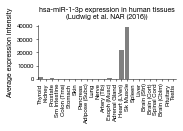

In [11]:
t_order = list(filter(lambda t: t in mir1['tissue_gtex'].unique(), pf.TISSUE_ORDER))

fig, ax = plt.subplots(figsize=(2.5, 1.75))
fig.subplots_adjust(bottom=0.4, left=0.20, right=0.97, top=0.83)
ax = sns.barplot(x='tissue_gtex', y='hsa-miR-1-3p expression', data=mir1,
                 order=t_order, ci=None, color='0.5')
ax.set_yticks(range(0, 50000, 10000))
ax.set_ylabel("Average expression intensity")
ax.set_title("hsa-miR-1-3p expression in human tissues\n(Ludwig et al. NAR (2016))")
ax.set_xlabel('')

ax = pf.rotate_ticklabels(ax, 'x')
ax = pf.simplify_tissues(ax, 'x')
ax = pf.format_spines(ax)
ax = pf.format_axis_labels(ax)

fig.savefig("{}/mir1_expression_ludwig2016.pdf".format(outdir))

### Non-human analyses

In [13]:
Data, meta = ds.get_bramerk_data()

In [14]:
Data['chicken'].head()

,SRR306710,SRR306711,SRR306712,SRR306713,SRR306714,SRR306715,SRR306716,SRR306717,SRR306718,SRR306719,...,SRR594517,SRR594518,SRR594519,SRR594520,SRR594521,SRR594522,SRR594523,SRR594524,SRR594525,SRR594526
ENSGALT00000103863.1,0.0,13.9472,0.00000,0.00000,0.0,0.0,0.0,10.9019,0.0,0.0,...,0.00000,0.0,894.1300,3.22057,13.1463,0.00000,185.13000,0.0,480.55000,6.72959
ENSGALT00000092144.1,0.0,0.0000,0.00000,0.00000,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.00000,0.0,10.5464,0.00000,0.0000,0.00000,0.00000,0.0,8.17674,9.00391
ENSGALT00000097599.1,0.0,0.0000,0.00000,0.00000,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.00000,0.0,1078.1300,23.83070,27.4461,0.00000,319.30800,0.0,668.08200,3.00294
ENSGALT00000096074.1,0.0,13.9472,6.39116,0.00000,0.0,0.0,0.0,11.5154,0.0,0.0,...,0.00000,0.0,1283.2200,9.79281,18.2454,1.22801,59.16540,0.0,886.11900,3.15316
ENSGALT00000093123.1,0.0,0.0000,0.00000,6.11378,0.0,0.0,0.0,0.0000,0.0,0.0,...,4.18005,0.0,20.0572,0.00000,0.0000,0.00000,5.54166,0.0,31.31470,0.00000


In [15]:
Data['chimp'].head()

,SRR306811,SRR306812,SRR306813,SRR306814,SRR306815,SRR306816,SRR306817,SRR306818,SRR306819,SRR306820,SRR306821,SRR306822,SRR306823,SRR306824,SRR306825
ENSPTRT00000098376.1,0.0,0.0,0.000000,0.0,0.0,1.46665,0.0,0.0,0.339406,0.260917,0.461038,0.0,0.0,0.0,0.00000
ENSPTRT00000091526.1,0.0,0.0,0.969149,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,4.43994
ENSPTRT00000091354.1,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.63085
ENSPTRT00000080032.1,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000
ENSPTRT00000096913.1,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.43785


In [16]:
Data['mouse'].head()

,SRR306757,SRR306758,SRR306759,SRR306760,SRR306761,SRR306762,SRR306763,SRR306764,SRR306765,SRR306766,...,SRR594409,SRR594410,SRR594411,SRR594412,SRR594413,SRR594414,SRR594415,SRR594416,SRR594417,SRR594418
ENSMUST00000193812.1,0.172560,0.000000,0.00000,0.271645,0.266830,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.473277,0.173565,0.091467,0.165460,0.000000,0.000000,0.231070,0.049395,0.226839,0.131853
ENSMUST00000082908.1,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUST00000070533.4,9.983000,10.944100,11.91540,11.951400,12.876100,7.02705,7.491060,5.94303,5.396720,0.065514,...,0.004165,3.084980,0.000000,0.017878,0.051675,0.012139,0.045185,0.031586,0.011480,0.029289
ENSMUST00000192857.1,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.991368,0.000000,0.000000,0.000000,0.000000,0.067834,0.000000,0.000000,0.000000
ENSMUST00000195335.1,0.050569,0.228657,0.24255,0.310439,0.386851,0.00000,0.182178,0.00000,0.166102,0.000000,...,0.000000,0.403660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020692


In [17]:
Data['rhesus'].head()

,SRR306777,SRR306778,SRR306779,SRR306780,SRR306781,SRR306782,SRR306783,SRR306784,SRR306785,SRR306786,...,SRR594463,SRR594464,SRR594465,SRR594466,SRR594467,SRR594468,SRR594469,SRR594470,SRR594471,SRR594472
ENSMMUT00000085913.1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1.67490,0.00000,0.00000,...,0.085885,2.182710,3.79613,0.000000,1.470810,0.63716,4.13560,0.0,271.226000,0.365335
ENSMMUT00000096925.1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,2.17568,2.08355,0.00000,...,0.187209,0.600788,2.22799,0.605009,0.000000,0.00000,2.36164,0.0,321.897000,0.418185
ENSMMUT00000086702.1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.00000,...,0.242500,0.000000,5.37026,0.000000,1.529310,0.00000,10.86360,0.0,15.702300,0.000000
ENSMMUT00000103209.1,0.0,0.0,0.0,0.0,0.0,1.01849,0.0,3.55477,1.70213,2.38883,...,0.112001,0.668276,32.12040,0.402128,9.322130,6.13184,57.10780,0.0,79.400800,0.000000
ENSMMUT00000091584.1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.00000,1.70640,...,0.000000,0.000000,2.09717,0.000000,0.859605,0.00000,0.00000,0.0,0.174409,0.000000


In [18]:
meta.head()

,SAMPID,TISSUE,SEX,STUDY,SPECIES
0,SRR306710,Brain,female,brawand,chicken
1,SRR306711,Brain,male,brawand,chicken
2,SRR306712,Cerebellum,female,brawand,chicken
3,SRR306713,Cerebellum,male,brawand,chicken
4,SRR306714,Heart,female,brawand,chicken


#### Plot Y/X ratios for chimp and rhesus

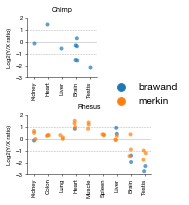

In [19]:
TISSUE_ORDER = ['Kidney', 'Colon', 'Lung', 'Heart', 'Muscle', 'Spleen', 'Liver', 
                'Brain', 'Testis']

fig = plt.figure(figsize=(2.3, 2.75))
axes = []
axes.append(fig.add_axes([0.21, 0.62, 0.42, 0.3]))
#axes.append(fig.add_axes([0.21, 0.62, 0.75, 0.3]))
axes.append(fig.add_axes([0.21, 0.13, 0.75, 0.3]))

for ax, spc in zip(axes, ('chimp', 'rhesus')):

    data_s = Data[spc].copy()
    meta_s = meta.loc[meta['SPECIES']==spc].set_index('SAMPID')
    assert data_s.columns.isin(meta_s.index).all()

    t_order = list(filter(lambda t: t in set(meta_s['TISSUE']), TISSUE_ORDER))

    # subset to males
    data_s = data_s.loc[:, meta_s.loc[data_s.columns, 'SEX']=='male']

    # ratio
    ratio = np.log2((data_s.loc['EIF1AY'] + 0.5) / (data_s.loc['EIF1AX'] + 0.5))
    df = pd.DataFrame({'Log2(Y/X ratio)':ratio})
    df['tissue'] = meta_s.loc[df.index, 'TISSUE']
    df['study'] = meta_s.loc[df.index, 'STUDY']
    
    ax = sns.stripplot(x='tissue', y='Log2(Y/X ratio)', hue='study', data=df, ax=ax,
                       alpha=0.7, order=t_order, s=4)
    
    if spc == 'chimp':
        ax.legend_.remove()
    else:
        ax.legend(loc='lower left', bbox_to_anchor=(0.6, 1), frameon=False)
        
    ax.set_xlabel('')
    for lab in ax.get_xticklabels():
        lab.set_rotation('vertical')
        
    ax.set_ylim([-3, 2])
    ax.set_yticks(np.arange(-3, 3))
    
    xlim = ax.get_xlim()
    ax.set_xlim(xlim)
    ax.plot(xlim, [0, 0], ls='-', color='0.7', lw=0.5)
    ax.plot(xlim, [-1, -1], ls='--', color='0.7', lw=0.5)
    ax.plot(xlim, [1, 1], ls='--', color='0.7', lw=0.5)
    
    ax.set_title(spc.capitalize())
    ax = pf.format_spines(ax)
    ax = pf.format_axis_labels(ax, ticklabsize=6, labsize=6, titlesize=7)
    
fig.savefig("{}/EIF1AXY_YXratio_primates.pdf".format(outdir))

#### EIF1AX ortholog expression across four species

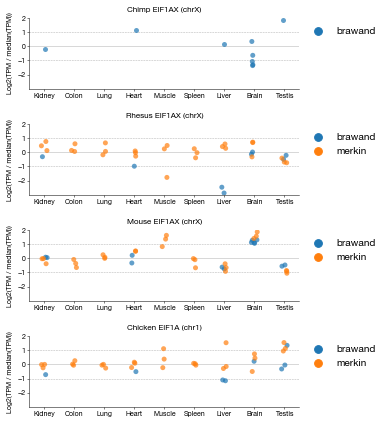

In [20]:
fig, axes = plt.subplots(4, 1, figsize=(6, 6))
fig.subplots_adjust(hspace=0.5, bottom=0.05, top=0.95, right=0.75)

for ax, spc in zip(axes, ('chimp', 'rhesus', 'mouse', 'chicken')):
    
    data_s = Data[spc].copy()
    meta_s = meta.loc[meta['SPECIES']==spc].set_index('SAMPID')
    assert data_s.columns.isin(meta_s.index).all()

    t_order = list(filter(lambda t: t in set(meta_s['TISSUE']), TISSUE_ORDER))

    # subset to males
    data_s = data_s.loc[:, meta_s.loc[data_s.columns, 'SEX']=='male']

    # normalize
    data_s = general.housekeeping_normalize(data_s)

    data_s = data_s.reindex(['EIF1AX'])
    data_s.index.name = 'gene'

    df = pd.melt(data_s.reset_index(), id_vars='gene', var_name='SAMPID', value_name='TPM')
    df = pd.merge(df, meta_s[['TISSUE', 'STUDY']], left_on='SAMPID', right_index=True)
    logtpm = df['TPM'].copy()
    logtpm[logtpm < 0.5] = 0.5
    df['Log2(TPM)'] = np.log2(logtpm)
    df['Log2(TPM / median(TPM))'] = np.log2(df['TPM'] / np.median(df['TPM']))

    ax = sns.stripplot(x='TISSUE', y='Log2(TPM / median(TPM))', hue='STUDY', 
                       data=df, ax=ax,
                       alpha=0.7, order=TISSUE_ORDER)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
    
    ax.set_ylim([-3, 2])
    ax.set_yticks(np.arange(-2, 3))
    
    xlim = ax.get_xlim()
    ax.set_xlim(xlim)
    ax.plot(xlim, [0, 0], ls='-', color='0.7', lw=0.5)
    ax.plot(xlim, [-1, -1], ls='--', color='0.7', lw=0.5)
    ax.plot(xlim, [1, 1], ls='--', color='0.7', lw=0.5)
    ax.set_xlabel('')
    
    if spc == 'chicken':
        ax.set_title("Chicken EIF1A (chr1)")
    else:
        ax.set_title("{} EIF1AX (chrX)".format(spc.capitalize()))
    
    ax = pf.format_spines(ax)
    ax = pf.format_axis_labels(ax, ticklabsize=7, labsize=7, titlesize=8)
    
fig.savefig("{}/EIF1AX_fourspecies.pdf".format(outdir))